In [ ]:
# Lab Day 4 - Feature selection, decision tree, probabilistic model, support vector machine and kNN
## Part 01. Feature selection and decision tree
### Task 01. Decision tree on wine dataset
- use a decision tree to classify wine into 3 classes

In [ ]:
# load the data
from sklearn.datasets import load_wine
import pandas as pd
wine = load_wine()
winedata = pd.DataFrame(data= wine.data, columns=wine.feature_names)
winedata['target'] = pd.Series(wine.target)
winedata.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
# decision tree

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
# features, target = load_breast_cancer(return_X_y=True)
# X_train, X_test, Y_train, Y_test = train_test_split(features, target,
# test_size=0.30,
# random_state=0)

X = wine.data
y = wine.target

# put in splits

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

# ok lets evaluate with f1
f1 = metrics.f1_score(y_test, y_pred, average="weighted")
print("f1 =", f1) # seems pretty good
# it ws complaining about the averge so I've used weighted more or less at random here and don't really know what it does
# so watch out for that lol

f1 = 0.9441413851405238


#### Task 02. Decision tree on breast cancer dataset

In [ ]:
# load data
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
df= pd.DataFrame(data= dataset.data, columns=dataset.feature_names)
df['target'] = pd.Series(dataset.target)
df.head(5)
features, target = load_breast_cancer(return_X_y=True)

In [ ]:
# build the tree
# (how do I view the tree?)

# put in splits

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 0)

model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

# ok lets evaluate with f1
f1 = metrics.f1_score(y_test, y_pred)
print("f1 =", f1) # seems pretty good
# still, would be really nice to view the trees...

f1 = 0.9622641509433962


## Part 02. Probabilistic model
### Tutorial 01. Gaussian Naive Bayes Classifier


In [22]:
#Step 1: Import required libraries and load the breast cancer dataset
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import pandas as pd
#Load the breast cancer dataset
breast_cancer = load_breast_cancer()
#Step 2: Prepare data for classification
#Split the dataset into features and labels
breast_cancer_data = breast_cancer.data
breast_cancer_target = breast_cancer.target
#Convert the dataset into a pandas DataFrame for easier data exploration
df = pd.DataFrame(data=breast_cancer.data,
columns=breast_cancer.feature_names)
df['target'] = breast_cancer.target
#Display the first 10 rows of the dataset
print(df.head(10))
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data,
breast_cancer_target, test_size=0.3, random_state=42)
#Step 3: Train and evaluate the Gaussian Naive Bayes Classifier
# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()
#Train the classifier on the training dataset
gnb.fit(X_train, y_train)
#Use the trained classifier to make predictions on the test dataset
y_pred = gnb.predict(X_test)
#Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# ok, all this makes sense no problems

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   
5        12.45         15.70           82.57      477.1          0.12780   
6        18.25         19.98          119.60     1040.0          0.09463   
7        13.71         20.83           90.20      577.9          0.11890   
8        13.00         21.82           87.50      519.8          0.12730   
9        12.46         24.04           83.97      475.9          0.11860   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760         0.30010              0.14710         0.2419   
1           0

### Task 03. Naive Bayes Classifiers Test
- Clean the data
- do a 20% test split
- Do a naive bayes classification
- evaluate the classification
- CRY


In [42]:
import numpy as np
# Read dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age',
'class']
df = pd.read_csv(url, names=names)

# clean - replace 0 (missing) with means
# first replace 0 with NaN
df.replace(0, np.nan, inplace=True)
# then replace with means
df.fillna(df.mean(), inplace=True)
display(df)

# ok, data is clean now

#Split the dataset into features and labels
df_data = df.loc[:, df.columns != "class"]
df_target = df.loc[:,"class"]

display(df_target)

# breast_cancer_target = breast_cancer.target
# #Convert the dataset into a pandas DataFrame for easier data exploration
# df = pd.DataFrame(data=breast_cancer.data,
# columns=breast_cancer.feature_names)
# df['target'] = breast_cancer.target
# #Display the first 10 rows of the dataset
# print(df.head(10))

# #Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_data, df_target, test_size=0.2, random_state=42)

#Step 3: Train and evaluate the Gaussian Naive Bayes Classifier
# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()
#Train the classifier on the training dataset
gnb.fit(X_train, y_train)
#Use the trained classifier to make predictions on the test dataset
y_pred = gnb.predict(X_test)
#Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# slightly suspicious that my accuracy is 100% like something must be wrong...
# note this when checking results

,preg,glucose,bp,skin,insulin,bmi,pedigree,age,class
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1.0
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31,1.0
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1.0
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21,1.0
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1.0
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.00000,180.000000,32.9,0.171,63,1.0
764,2.000000,122.0,70.0,27.00000,155.548223,36.8,0.340,27,1.0
765,5.000000,121.0,72.0,23.00000,112.000000,26.2,0.245,30,1.0
766,1.000000,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1.0


0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
763    1.0
764    1.0
765    1.0
766    1.0
767    1.0
Name: class, Length: 768, dtype: float64

Accuracy: 1.0


## Part 03. Support Vector Machine and kNN
### Tutorial 02. Use of the SVM and kNN functions
- the following code works when yu have two features and you want to plot the class boundary
#### 1) load a dataset of two features

In [43]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets, neighbors
from sklearn.metrics import accuracy_score
iris = datasets.load_iris()# Select 2 features / variables
X = iris.data[:, :2] # we only take the first two features.
y = iris.target
feature_names = iris.feature_names[:2]
classes = iris.target_names

#### 2) functions for drawing class boundaries

In [46]:
def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min() - 1, x.max() + 1
  y_min, y_max = y.min() - 1, y.max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = ax.contourf(xx, yy, Z, **params)
  return out

#### 3) classification and visualisation with SVM and kNN

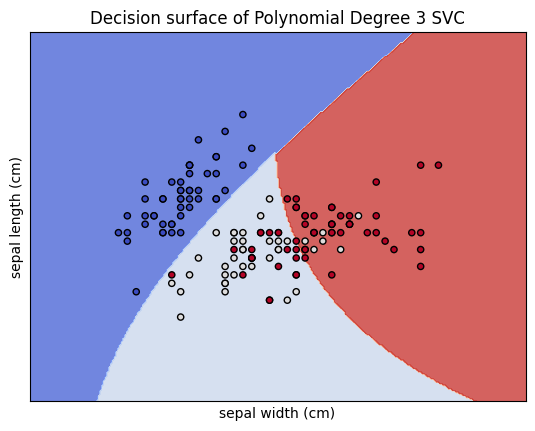

SVM accuracy_score:0.8133333333333334


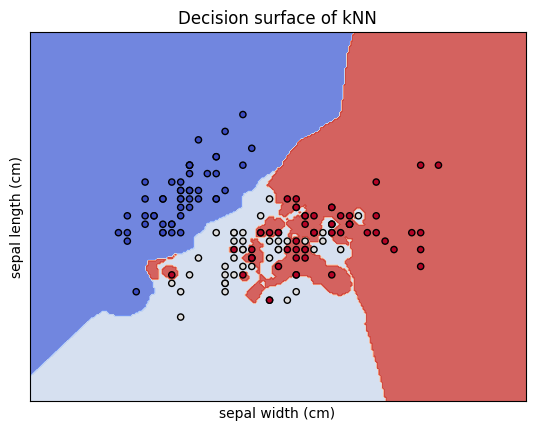

kNN accuracy_score:0.9266666666666666


In [47]:
# SVM
model = svm.SVC(kernel="poly", degree=3)
clf = model.fit(X, y)
fig, ax = plt.subplots()

# title for the plots
title = ('Decision surface of Polynomial Degree 3 SVC')

# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_ylabel("{}".format(feature_names[0]))
ax.set_xlabel("{}".format(feature_names[1]))
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()
print(f'SVM accuracy_score:{accuracy_score(y, clf.predict(X))}')

# kNN
from sklearn import neighbors
clf_kNN = neighbors.KNeighborsClassifier(n_neighbors=3, weights='distance')
clf_kNN.fit(X, y)
y_pred=clf_kNN.predict(X)
fig, ax = plt.subplots()

# title for the plots
title = ('Decision surface of kNN')

# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf_kNN, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_ylabel("{}".format(feature_names[0]))
ax.set_xlabel("{}".format(feature_names[1]))
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()
print(f'kNN accuracy_score:{accuracy_score(y, y_pred)}')

# k so this is v reliant on the functions above. I would NOT have worked this out.

### Task 04. SVM and kNN experiment on wine dataset
- so fing tired but this is the last bit (and I expect it's gonna be v hard). I have got 10 mins left on my timer so lets give it a bash
#### 1) use SVM with several "popular kernels" (already like wtf) to work on the wine dataset

In [62]:
# load the data
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, datasets
wine = load_wine()
X = wine.data[:,:2] # chose first two feature at random, if doing this properly would do some robust feature selection...
y = wine.target

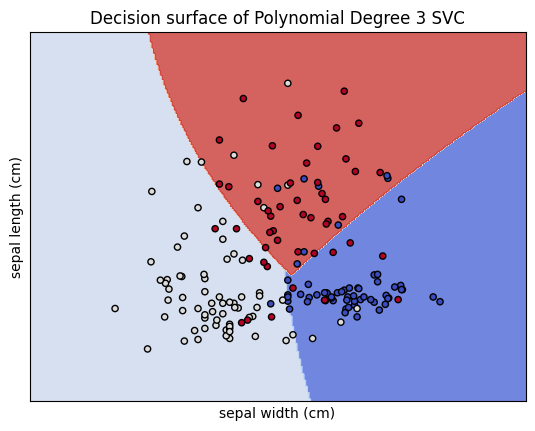

SVM accuracy_score:0.797752808988764


In [61]:
# SVM
model = svm.SVC(kernel="poly", degree=3)
clf = model.fit(X, y)
fig, ax = plt.subplots()

# title for the plots
title = ('Decision surface of Polynomial Degree 3 SVC')

# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_ylabel("{}".format(feature_names[0]))
ax.set_xlabel("{}".format(feature_names[1]))
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()
print(f'SVM accuracy_score:{accuracy_score(y, clf.predict(X))}')

#### 2) Use kNN to make the classification on the wine dataset. Compare the results.

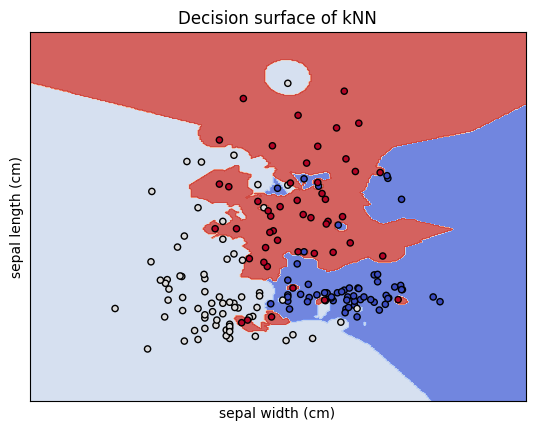

kNN accuracy_score:1.0


In [63]:
# kNN
from sklearn import neighbors
clf_kNN = neighbors.KNeighborsClassifier(n_neighbors=3, weights='distance')
clf_kNN.fit(X, y)
y_pred=clf_kNN.predict(X)
fig, ax = plt.subplots()

# title for the plots
title = ('Decision surface of kNN')

# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf_kNN, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_ylabel("{}".format(feature_names[0]))
ax.set_xlabel("{}".format(feature_names[1]))
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()
print(f'kNN accuracy_score:{accuracy_score(y, y_pred)}')

# k so this is v reliant on the functions above. I would NOT have worked this out.

#### 3) bonus extra work (unlikely...) - compare results using standardised and original data

... ok I'm calling it there. Honestly not sure how much of this has sunk in but at least I'm up to date for class tomorrow and I can try to review over the weekend.